<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día
<ul>
<li>Histograma de una imagen</li>
<li>Lectura de imagenes</li>
</ul>

<img src="res/pipeline.png"/>

El objetivo del preprocesamiento es mejorar la calidad y/o la apariencia de la imagen original para su análisis e interpretación.

Se resaltan ciertas características de la imagen (bordes, contraste, …) y se ocultan o eliminan otras  (por ejemplo, el ruido)

El preprocesamiento es una etapa previa que es necesaria para otras fases posteriores del proceso de visión artificial (segmentación, extracción de características, reconocimiento e interpretación).


<img src="res/prepro.png">

En esta ocasión nos centraremos en el punto más básico: ¿Qué es una imagen?


<hr>


## 1. Manejo básico de imágenes



Una imagen con un solo canal (matriz bidimensional) se conoce como imagen en escala de grises. Usualmente las principales técnicas de procesamiento de imágenes se aplican sobre imágenes de este tipo.
<br><br>
Cuando se habla de imágenes a color, el modelo más utilizado es el RGB. Una imagen a color en el espacio RGB, es una matriz 3-dimensional o una composición de tres imagenes a escala de grises, cada una conteniendo los valores de cada canal. Por convención, el canal 0 es el color Rojo, el canal 1 es el color Verde y el canal 2 es el color Azul.


<img src="res/img1.png"/>

A continuación, importemos las tres librerías que utilizaremos para el desarrollo de la clase: Matplotlib, Numpy, OpenCV.

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Hablemos un poco de la función *imread* de OpenCV. Esta función recibe dos parámetros: una cadena que especifica la ruta de la imagen (obligatorio), y una bandera que indicará cómo queremos leer la imagen (opcional).

    cv2.IMREAD_COLOR : Carga la imagen a color, omitiendo transparencias. Es la bandera por defecto.
    cv2.IMREAD_GRAYSCALE : Carga la imagen en escala de grises.
    cv2.IMREAD_UNCHANGED : Carga la imagen como tal, incluyendo el canal alpha si existe.

**Nota:** OpenCV cuenta con banderas para otras funciones. Basta con saber cuando una función recibe banderas como parámetro y buscar en la documentación de la misma.

Leamos una imagen en escala de grises y mostrémosla utilizando la función *imshow* del módulo pyplot de matplotlib. Esta función tiene muchos parámetros que iremos detallando durante el transcurso del curso. Sin embargo, es una buena idea echar un vistazo a la documentación:

http://matplotlib.org/users/image_tutorial.html <br>
https://matplotlib.org/stable/api/pyplot_summary.html <br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html <br>
https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/ <br>
https://www.labri.fr/perso/nrougier/teaching/matplotlib/


Afortunadamente, la mayoría de parámetros que recibe la función *imshow* son opcionales. Para este primer ejemplo le pasaremos a la función únicamente la imagen (obligatorio) y la variable **cmap** (de color map). El mapa de color solo puede ser utilizado para imágenes de un único canal, pero puede ser muy útil cuando queremos discernir mejor la variación entre niveles de gris.

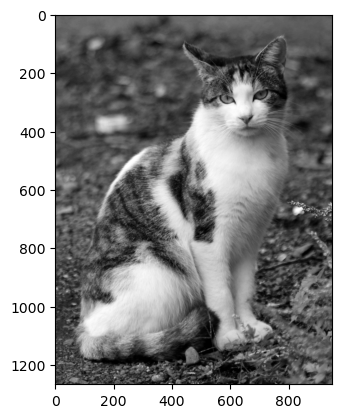

In [2]:
img = cv2.imread("res/gato.jpg", cv2.IMREAD_GRAYSCALE)
#gray, hot, jet...
plt.imshow(img, cmap="gray")
plt.show()

In [3]:
np.shape(img)

(1267, 950)

Las imágenes en escala de grises son arreglos bidimensionales, esto quiere decir que podemos acceder a un píxel arbitrario tal como lo haríamos en una matriz.

In [4]:
img[0,0]

94


Gracias a la simplicidad de Python podemos extraer "slices" (tajadas) de la imagen por medio de operaciones de indexación. Para este fin, es importante revisar la documentación de numpy sobre slicing.


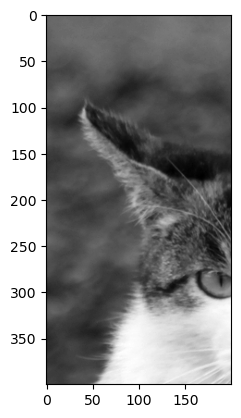

In [5]:
img_slice = img[0:400, 400:600]
"""Si nuestra imagen fuese a color, bastaría con añadir un tercer indice: 
img[50:250,50:250,:], ':' equivale a los valores mínimo y máximo del arreglo, 
nos permite conservar todos los valores en una dimensión dada y efectuar slicing en otra."""
plt.imshow(img_slice, cmap="gray")
plt.show()

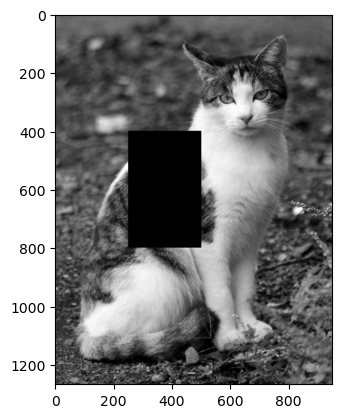

In [6]:
img = cv2.imread("res/gato.jpg", cv2.IMREAD_GRAYSCALE)
img_with_hole = img.copy()
img_with_hole[400:800,250:500] = 0
plt.imshow(img_with_hole, cmap="gray")
plt.show()

In [7]:
cv2.imwrite("guardadas/gato_hueco.jpg", img_with_hole)

True

Ahora leamos una imagen a color...

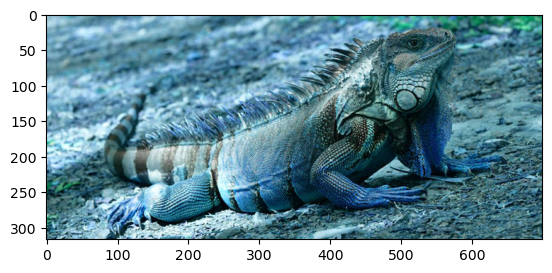

In [8]:
img_color = cv2.imread("res/iguana.jpg", cv2.IMREAD_COLOR) 
plt.imshow(img_color)
plt.show()


# ATENCIÓN

OpenCV maneja el modelo de color BGR, donde el canal principal 0 representa al color azul, el canal 1 representa al color verde, y el canal 2 representa al color rojo. Esto significa que al momento de leer una imagen con OpenCV, si queremos mostrarla con alguna librería como Matplotlib, esta tendrá los colores invertidos, como se observa arriba.

¿Cómo solucionamos este problema? Pensemos en una posible solución. Entre tanto, verifiquemos algunas de las propiedades que podemos extraer de una imagen...

In [9]:
img_type = type(img_color)
print("El tipo de estructura de datos de la imagen: ", img_type)

El tipo de estructura de datos de la imagen:  <class 'numpy.ndarray'>


In [10]:
img_b = img_color[:, :, 0]
img_g = img_color[:, :, 1]
img_r = img_color[: ,:, 2]

Arreglemos nuestra imagen a color de la manera "larga": creamos una imagen vacía y a esa imagen vacía le asignamos los canales de color de la imagen en BGR con orden inverso.

In [11]:
#Crear una matriz de ceros, del tamaño de la imagen original y el mismo tipo de datos
img_shape = np.shape(img_color)
img_fixed = np.zeros(img_shape, dtype=np.uint8)
#Enviar la información del canal 0 del espacio BGR (B) al canal 2 del espacio RGB (que sigue siendo B)
img_fixed[:,:,0] = img_color[:,:,2]
img_fixed[:,:,1] = img_color[:,:,1]
img_fixed[:,:,2] = img_color[:,:,0]

Nota: Utilizando matplotlib, podemos mostrar más de una imagen a la vez...

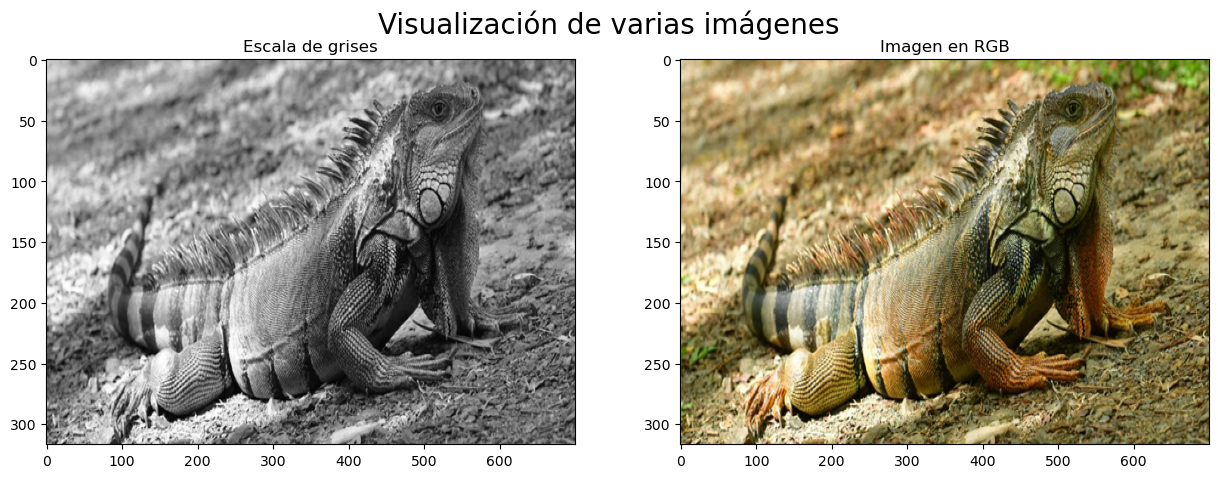

In [12]:
#Se lee la imagen en escala de grises y a color respectivamente (Se utiliza el parámetro #2 en la función para definirlo)
img_gray = cv2.imread("res/iguana.jpg", cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread("res/iguana.jpg", cv2.IMREAD_COLOR)
#Se crea el subplot 1x2 para mostrar las imagenes
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
#Se le da título a las figuras, título a cada imagen y se muestran las imágenes
fig.suptitle('Visualización de varias imágenes', fontsize=20)
ax1.set_title('Escala de grises')
ax1.imshow(img_gray, cmap='gray', aspect='auto')
ax2.set_title('Imagen en RGB')
ax2.imshow(img_fixed, cmap='gray', aspect='auto')
plt.show()


Nota: OpenCV tiene la función cvtColor, que nos permite cambiar con facilidad entre espacios o modelos de color...


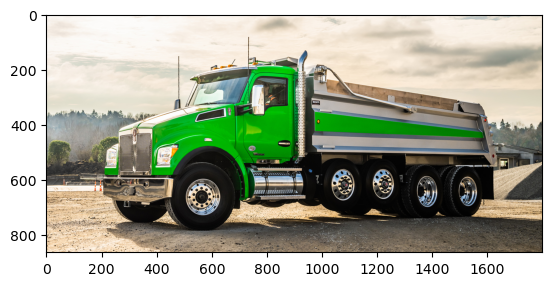

In [13]:
#Se lee la imagen a color (recordar que se lee en BGR en opencv)
img = cv2.imread("res/truck.jpg", cv2.IMREAD_COLOR)
#Se transforma de BGR a RGB (utilizando la función cvtColor con el parámetro COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#mostrar la imagen
plt.imshow(img)
plt.show()

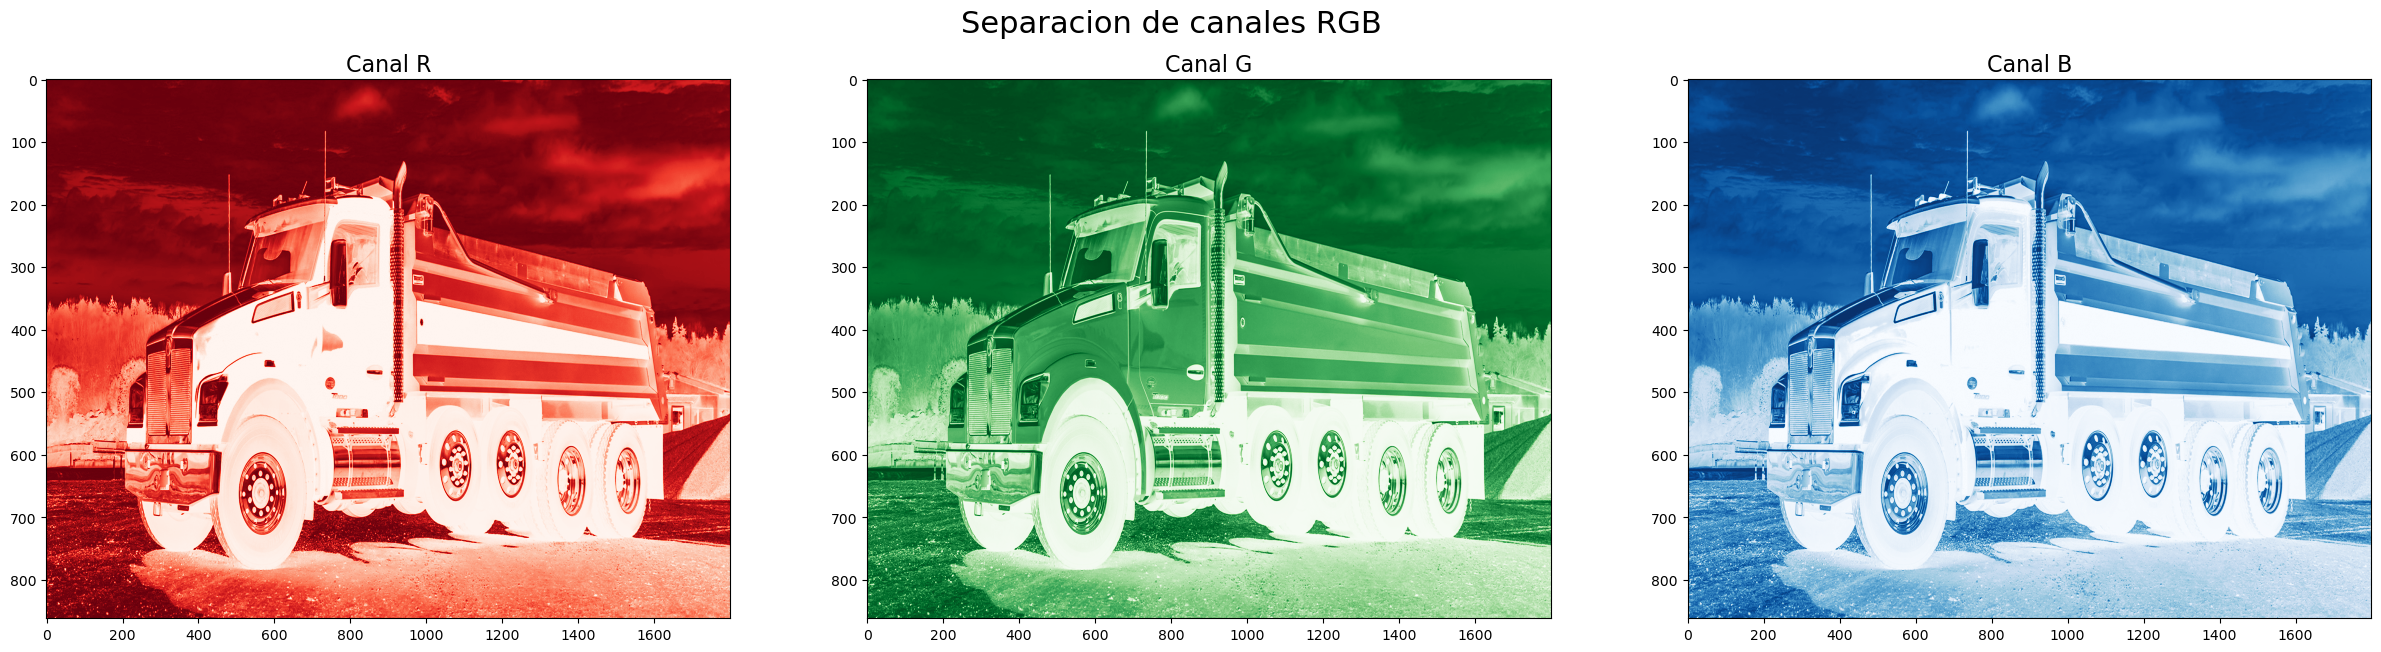

(862, 1800, 3)


In [14]:
#Como se vio antes, los canales R, G y B se pueden separar de la imagen original accediendo
#en forma de indices
img_R = img[:,:,0]
img_G = img[:,:,1]
img_B = img[:,:,2]
#Se crea el subplot 1x3
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 7))
#Se ponen títulos y se muestran las imágenes
fig.suptitle('Separacion de canales RGB', fontsize=22)
ax1.set_title('Canal R', fontsize=16)
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G', fontsize=16)
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B', fontsize=16)
ax3.imshow(img_B, cmap='Blues', aspect='auto')
plt.show()
print(img.shape)

Como vemos, distintos canales del RGB revelan distintos niveles de contraste entre los objetos de una imagen... Este es un factor importante a considerar para el resto de la materia.

Por otro lado, se muestran las dimensiones de la imagen RGB, que corresponden a (862,1800,3), este último valor indica el número de canales que componen la imagen, ya que nos encontramos en el espacio de color RGB, es posible descomponer la imagen en los canales R, G y B y estudiarlos individualmente.

<hr>

## 1.1. Histograma de una imagen
<ul>
    <li>El histograma de una imagen presenta la frecuencia de ocurrencia de los niveles de gris en la imagen, es decir, determina la distribución de frecuencias de los niveles de gris en la imagen.</li>
    <br>
    <li>Son un elemento importante en la etapa de Pre-procesamiento pues este nos ayuda a comprender y a determinar qué transformaciones usar para mejorar la calidad de una imagen.</li>
</ul>
<br>
<center><i>Figura. Histograma de una imagen.</i></center>
<img src="res/m3/histograma.png" alt="operaciones" style="height:300px"></img>
<br>
Un Ejemplo Simple …. Se trata de una imagen en niveles de gris muy simple, de 8x8 píxeles de tamaño. Sólo son posibles 4 niveles de gris, porque se van a usar 2 bits para codificar el nivel de intensidad de cada píxel. De la forma  habitual,  los  niveles  de  gris  se  numeran  del  0  al  3,  correspondiendo  un  brillo mayor a los valores más altos.
<br>
<center><i>Figura. ¿Cuál es el algoritmo para calcular el histograma?.</i></center>
<img src="res/m3/histograma_2.png" alt="operaciones" style="height:200px"></img>
<br>

Los histogramas (en su caso normalizado) se definen como la probabilidad de ocurrencia de un valor de gris, mediante la siguiente ecuación:
<br> $$ P(g) = \frac{N(g)}{M} $$ 
Donde N(g) es un contador de pixeles cuyo valor es g y M es el numero total de pixeles de la imagen.
<br>

<li>Los histogramas son una herramienta para el análisis de imágenes que permite determinar qué tan bueno es el contraste y la iluminación de la escena en la imagen.</li>
<li>En este sentido, el histograma nos ayuda a decidir cuál es el procesamiento más adecuado para mejorar la calidad de una imagen, tanto cualitativamente (nos sugiere qué operación aplicar), como cuantitativamente (en qué cantidad aplicar la operación).</li>
<li>En principio, una buena imagen debe producir un histograma más o menos uniforme y repartido en todo el rango de valores de niveles de gris, teniendo en cuenta que:</li>
    <ul>
    <li>En la parte izquierda se acumulan los tonos más oscuros.</li>
    <li>En la derecha se acumulan los más claros.</li>
    </ul>
</ul>
<br>
A continuación un ejemplo en Python de imágenes con propiedades distintas asociadas al histograma:
<hr>

In [15]:
# Funciones auxiliares para plotear las imagenes

def show_image_and_histogram(img_gray):
    """
    Muestra la imagen y su histograma en dos figuras.

    Parámetros:
    img_gray: Imagen en escala de grises

    """

    # Create a figure with two subplots, one for the image and one for the histogram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Show the image in the first subplot
    ax1.imshow(img_gray, cmap = "gray")
    ax1.set_title('Imagen')

    # Calculate the histogram of the image
    hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256], density= True)

    # Show the histogram in the second subplot
    ax2.plot(hist)
    ax2.set_title('Histograma')
    ax2.set_xlim([0, 256])

    # Display the plot
    plt.show()

def show_image_and_color_histogram(img_color):
    """
    Muestra la imagen y su histograma en dos figuras.

    Parámetros:
    img_color: Imagen en RGB

    """

    # Create a figure with two subplots, one for the image and one for the histograms
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Show the image in the first subplot
    ax1.imshow(img_color)
    ax1.set_title('Imagen')

    # Calculate the histograms of the image for each color channel
    hist_red, bins = np.histogram(img_color[:,:,0].ravel(), 256, [0, 256], density = True)
    hist_green, bins = np.histogram(img_color[:,:,1].ravel(), 256, [0, 256], density = True)
    hist_blue, bins = np.histogram(img_color[:,:,2].ravel(), 256, [0, 256], density = True)

    # Show the histograms in the second subplot
    ax2.plot(hist_red, color='r')
    ax2.plot(hist_green, color='g')
    ax2.plot(hist_blue, color='b')
    ax2.set_title('Histograma')
    ax2.set_xlim([0, 256])

    # Display the plot
    plt.show()

def img_read(filename, mode='color'):
    """
    Lee una imagen ya sea en escala de grises o en RGB.

    Parámetros:
    filename: La ruta del archivo de la imagen a leer.
    mode: Modo de lectura de la imagen.

    Returns:
    Imagen en RGB o en escala de grises.
    """
    if mode == 'color':
        # Lee la imagen a color utilizando OpenCV y la convierte de BGR a RGB
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    elif mode in ('grayscale', 'greyscale', 'gray', 'grey'):
        # Lee la imagen en escala de grises utilizando OpenCV
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        # Modo de lectura inválido
        return None



In [16]:
# La función ravel de numpy permite "aplanar" una matriz y volverla un vector 1-Dimensional
img1 = cv2.cvtColor(cv2.imread('res/m3/low_light.png'), cv2.COLOR_BGR2RGB)
img1 = img1.astype(np.uint8)
print(img1.ravel())

[ 77  97 119 ...  17  19   9]


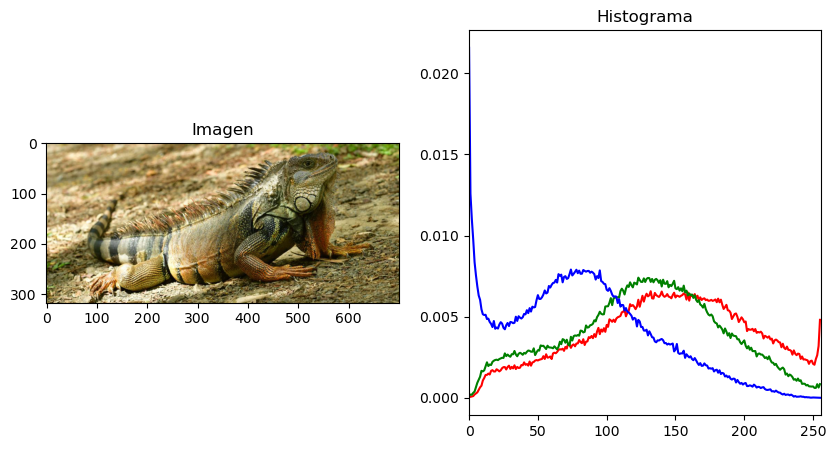

In [17]:
show_image_and_color_histogram(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

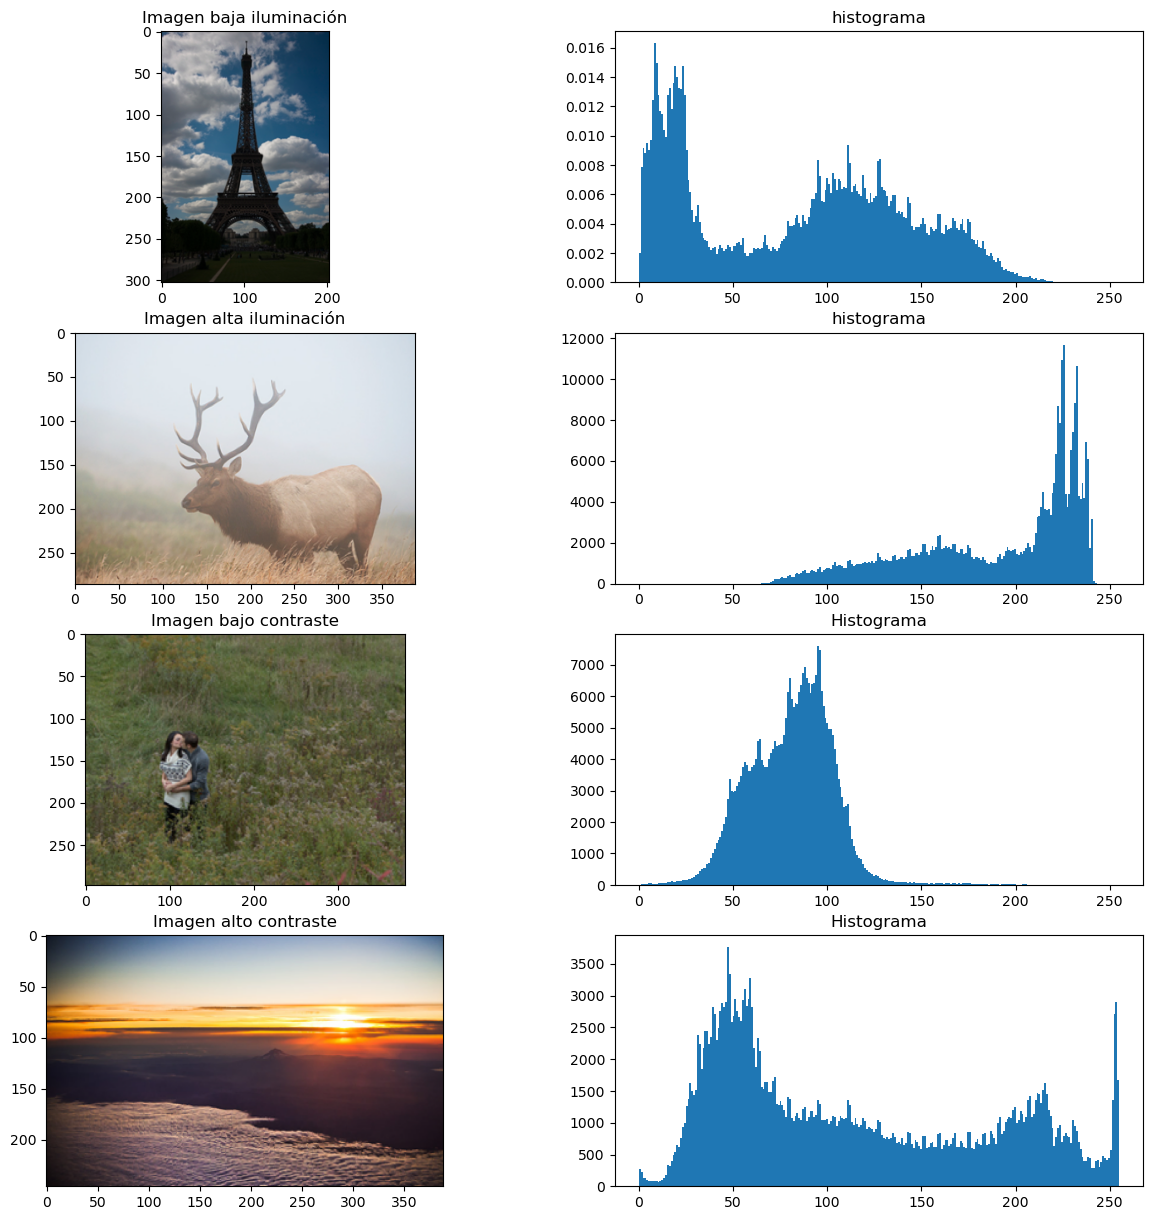

In [18]:
#Leer las imágenes 1 a la 4 en RGB
img1 = img_read('res/m3/low_light.png')
img2 = img_read('res/m3/hi_light.png')
img3 = img_read('res/m3/low_contrast.png')
img4 = img_read('res/m3/hi_contrast.png')

#_ = es una forma de eliminar el verbose de matplotlib

#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(4,2, figsize=(15, 15))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('Imagen baja iluminación')
#Imprimir la imagen 1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(img1)
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(img1[:,:, :].ravel(), bins=256, range=(0.0, 255.0), density = True)

#Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
arreglo_plots[1,0].set_title('Imagen alta iluminación')
arreglo_plots[1,0].imshow(img2)
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(img2[:,:, :].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[2,0].set_title('Imagen bajo contraste')
arreglo_plots[2,0].imshow(img3)
arreglo_plots[2,1].set_title('Histograma')
_ = arreglo_plots[2,1].hist(img3[:,:, :].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[3,0].set_title('Imagen alto contraste')
arreglo_plots[3,0].imshow(img4)
arreglo_plots[3,1].set_title('Histograma')
_ = arreglo_plots[3,1].hist(img4[:,:, :].ravel(), bins=256, range=(0.0, 255.0))

plt.show()

### Analicemos
<br>
Las siguientes imágenes se encuentran en la ruta res/m3/ y sus nombres son: example_1, example_2, example_3, example_4
<br>
<i>¿Qué tipo de histograma tiene cada imagen?</i>

<img src="res/m3/analisis_histograma.png" alt="operaciones" style="height:400px"></img>

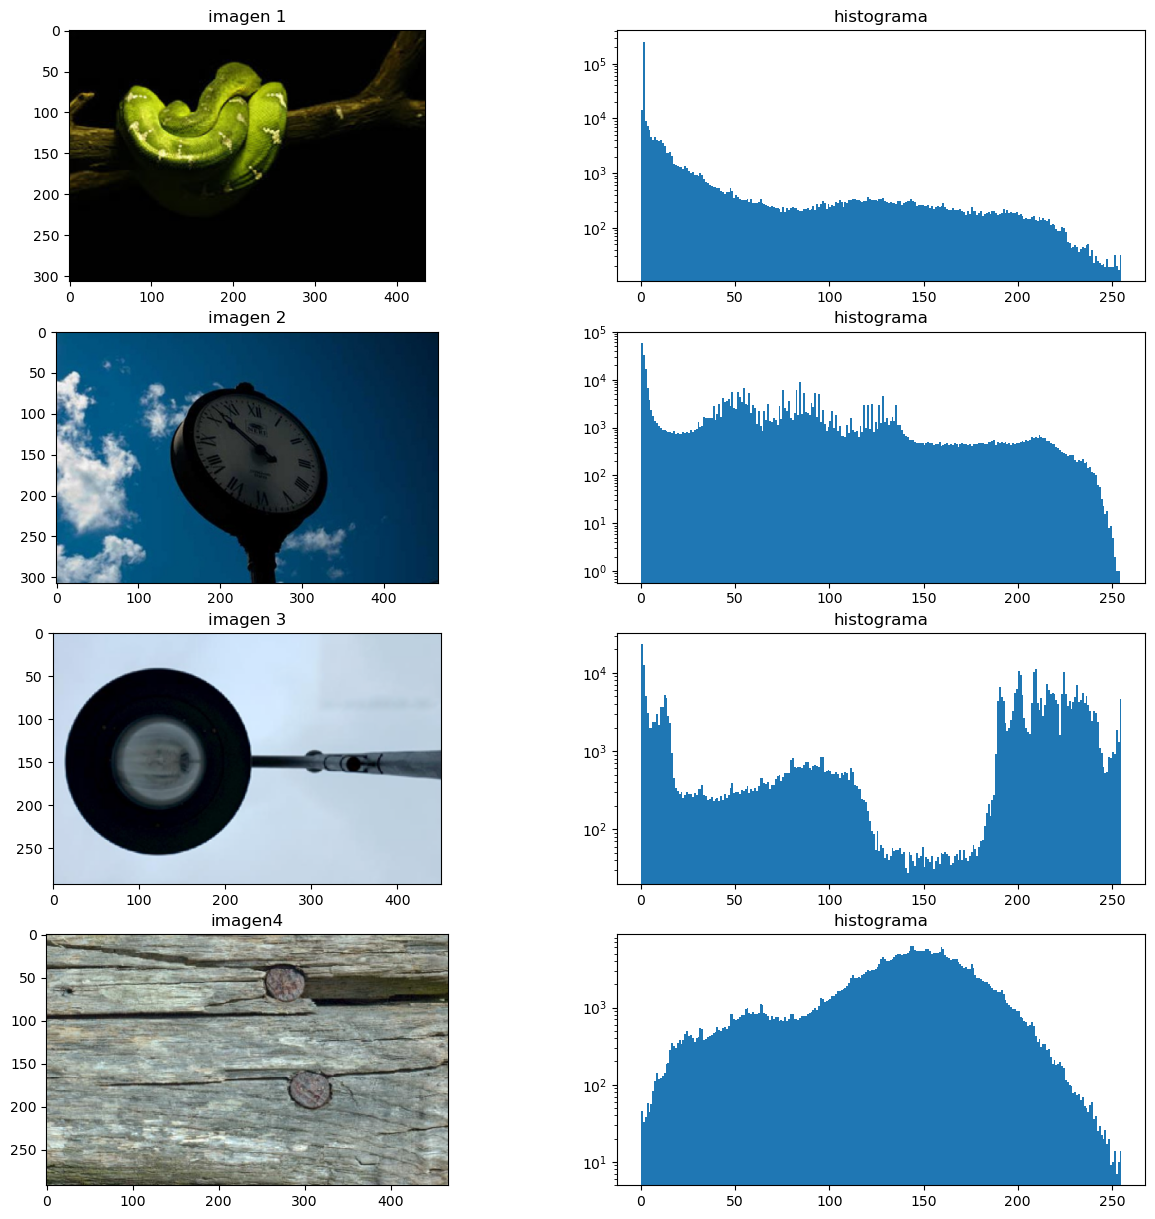

In [19]:
#Lectura de las imágenes
I1 = img_read('res/m3/example_1.png')
I2 = img_read('res/m3/example_2.png')
I3 = img_read('res/m3/example_3.png')
I4 = img_read('res/m3/example_4.png')

#Conversión de RGB a Escala de grises para cada imagen
#I1 = cv2.cvtColor(I1, cv2.COLOR_RGB2GRAY)
#I2 = cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY)
#I3 = cv2.cvtColor(I3, cv2.COLOR_RGB2GRAY)
#I4 = cv2.cvtColor(I4, cv2.COLOR_RGB2GRAY)

#_ = es una forma de eliminar el verbose de matplotlib
#Se debe "aplanar" la imagen antes
I1_array=I1.ravel()
#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(4,2, figsize=(15, 15))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('imagen 1')
#Imprimir la imagen I1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(I1, cmap="gray")
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(I1_array, bins=255, range=(0.0, 255.0), log=True)

#Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
I2_array=I2.ravel()
arreglo_plots[1,0].set_title('imagen 2')
arreglo_plots[1,0].imshow(I2, cmap="gray")
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(I2_array, bins=255, range=(0.0, 255.0),log=True)

I3_array=I3.ravel()
arreglo_plots[2,0].set_title('imagen 3')
arreglo_plots[2,0].imshow(I3, cmap="gray")
arreglo_plots[2,1].set_title('histograma')
_ = arreglo_plots[2,1].hist(I3_array, bins=255, range=(0.0, 255.0),log=True)

I4_array=I4.ravel()
arreglo_plots[3,0].set_title('imagen4')
arreglo_plots[3,0].imshow(I4, cmap="gray")
arreglo_plots[3,1].set_title('histograma')
_ = arreglo_plots[3,1].hist(I4_array, bins=255, range=(0.0, 255.0),log=True)

plt.show()

## Histogramas por canal de color

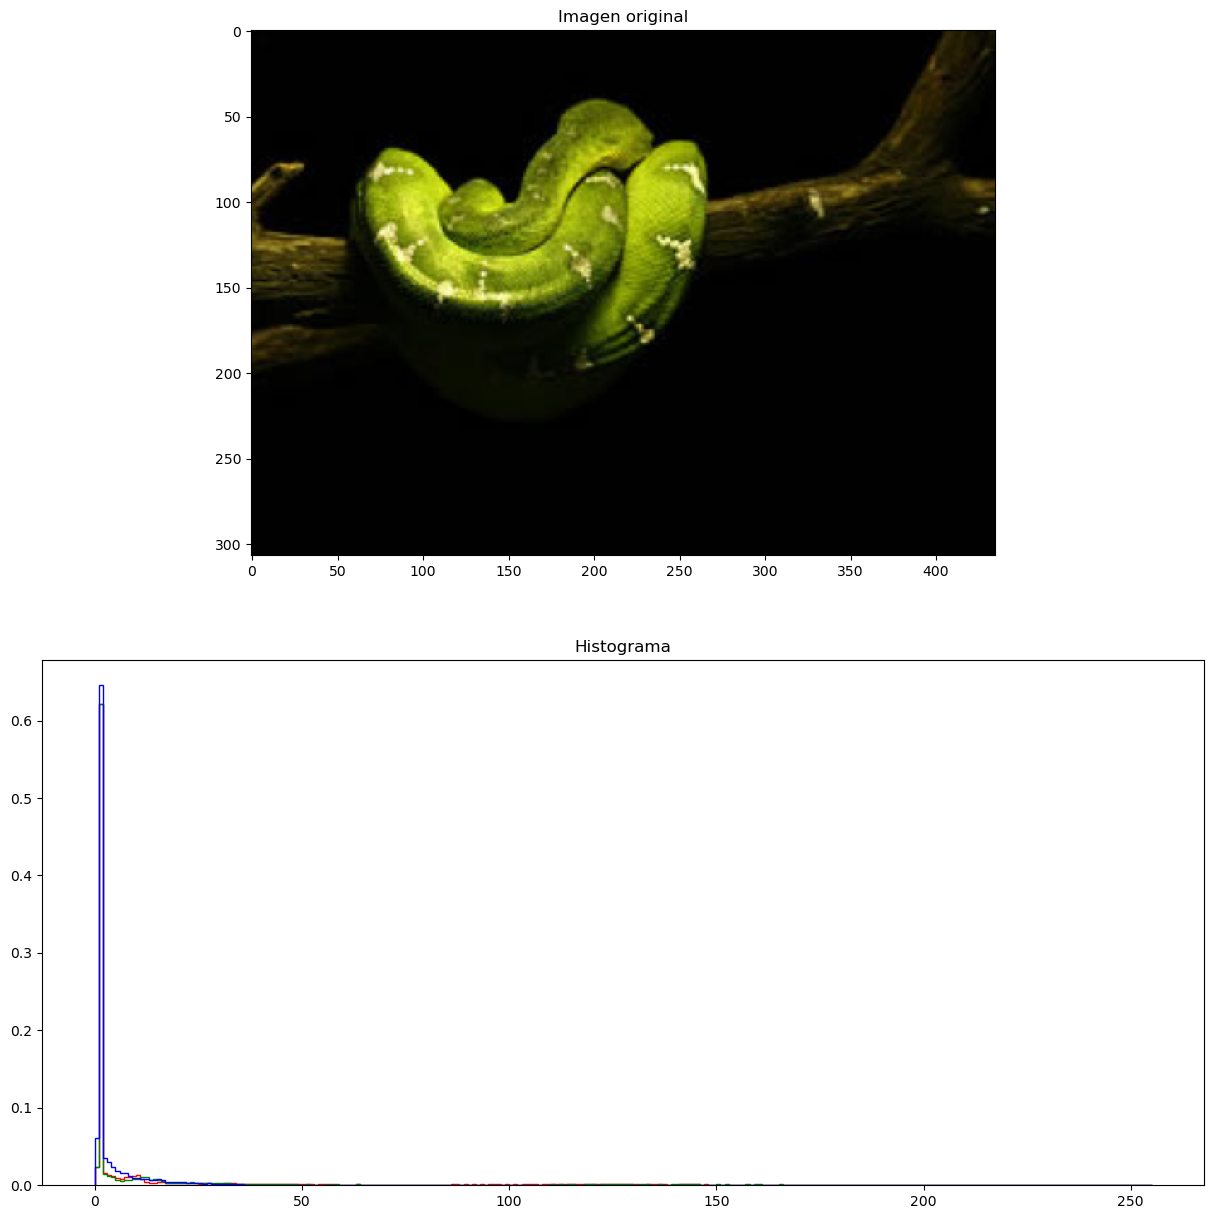

In [20]:
I1 = img_read('res/m3/example_1.png')
#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,1, figsize=(15, 15))
colors = ('r','g','b')
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(I1)
arreglo_plots[1].set_title('Histograma')
for i,col in enumerate(colors):
    img_array_i = I1[:,:,i].ravel()
    arreglo_plots[1].hist(img_array_i,histtype='step', bins=255,
                            range=(0.0, 255.0),density=True, color=colors[i])
    
plt.show()